In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df_index=pd.read_csv("economic_index.csv")

In [6]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
#drop unnecessary column
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [8]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
##check the null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

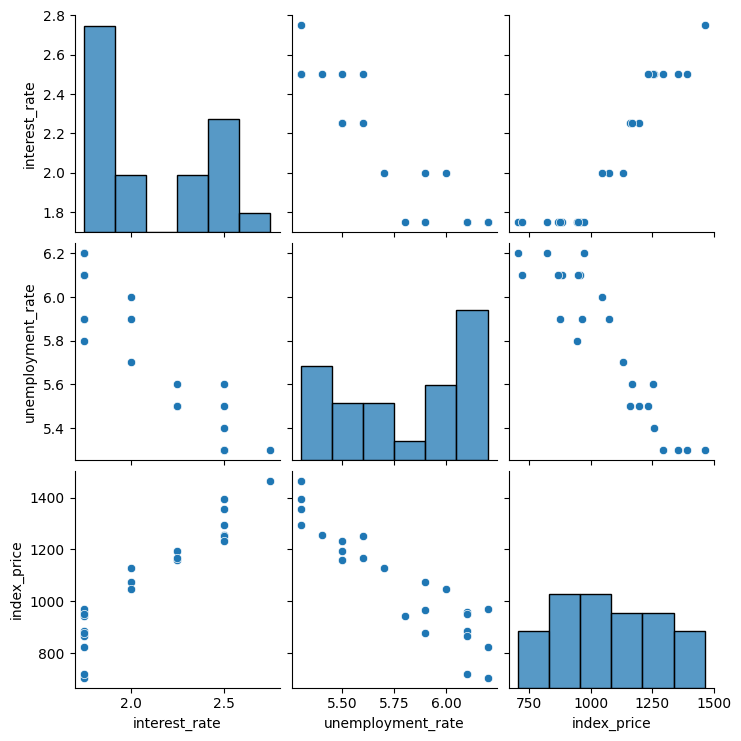

In [10]:
##Visualization
import seaborn as sns
sns.pairplot(df_index)

In [11]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployement rate')

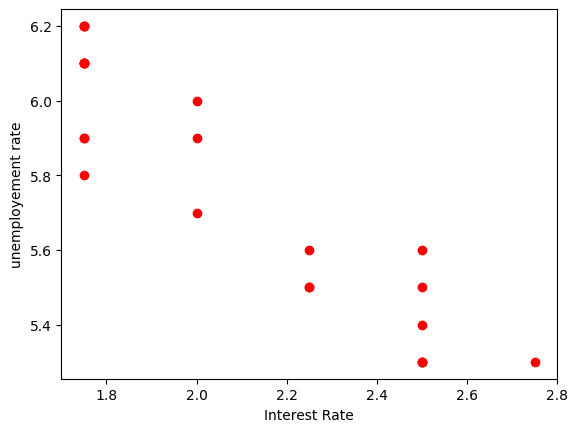

In [12]:
#visualize the datapoints more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('Interest Rate')
plt.ylabel('unemployement rate')

In [13]:
## independent and dependent features
# X=df_index[['interest_rate','unemployment_rate']]
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]


In [14]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [15]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [16]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=45)

In [17]:
import seaborn as sns
print(sns.__version__)

0.13.2


<Axes: xlabel='interest_rate', ylabel='index_price'>

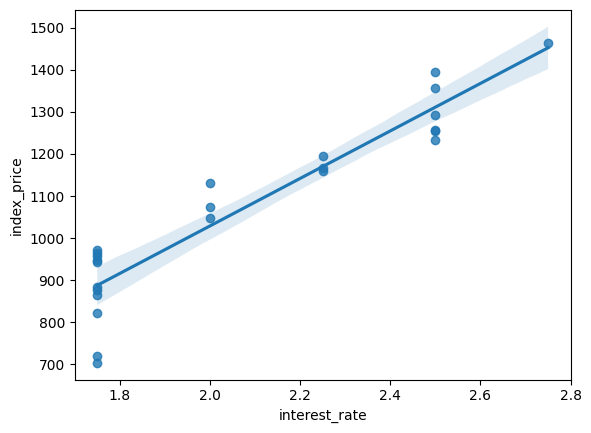

In [18]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

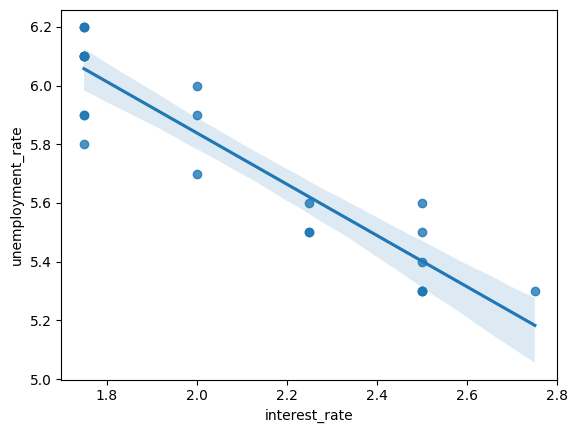

In [19]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [22]:
X_train

array([[-1.21267813,  1.48726325],
       [-1.21267813,  1.18646843],
       [ 0.9701425 , -1.21989008],
       [-1.21267813,  1.18646843],
       [-0.48507125,  0.88567362],
       [ 0.24253563, -0.61830045],
       [ 0.24253563, -0.61830045],
       [ 0.9701425 , -0.61830045],
       [ 0.24253563, -0.31750564],
       [ 0.9701425 , -0.31750564],
       [-1.21267813,  0.28408399],
       [ 0.9701425 , -1.21989008],
       [-1.21267813,  1.18646843],
       [ 0.9701425 , -0.91909527],
       [-1.21267813,  1.48726325],
       [ 1.69774938, -1.21989008],
       [ 0.9701425 , -1.21989008],
       [-0.48507125,  0.58487881]])

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [24]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scorinf)